In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for ofline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [24]:
BN = pd.read_csv('C:/Users/INDIAN/Downloads/banknifty_data1.csv')
BN.head()


,Date,open,high,low,close,weekday,range_HL,range_OC,type
0,2000-01-03 09:15:00 005:30,1054.8101,1054.8101,1054.8101,1054.8101,0,0.0,0.0,Tie
1,2000-01-04 09:15:00 005:30,1092.0800,1092.0800,1092.0800,1092.0800,1,0.0,0.0,Tie
2,2000-01-05 09:15:00 005:30,1055.9900,1055.9900,1055.9900,1055.9900,2,0.0,0.0,Tie
3,2000-01-06 09:15:00 005:30,1086.6700,1086.6700,1086.6700,1086.6700,3,0.0,0.0,Tie
4,2000-01-07 09:15:00 005:30,1126.9900,1126.9900,1126.9900,1126.9900,4,0.0,0.0,Tie


In [12]:
BN.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569 entries, 0 to 5568
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5569 non-null   object 
 1   open      5569 non-null   float64
 2   high      5569 non-null   float64
 3   low       5569 non-null   float64
 4   close     5569 non-null   float64
 5   weekday   5569 non-null   int64  
 6   range_HL  5569 non-null   float64
 7   range_OC  5569 non-null   float64
 8   type      5569 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 391.7+ KB


In [13]:
BN['Date'] = pd.to_datetime(BN['Date'])

In [14]:
print(f'Dataframe contains stock prices between {BN.Date.min()} {BN.Date.max()}')
print(f'Total days = {(BN.Date.max() - BN.Date.min()).days}days')

Dataframe contains stock prices between 2000-01-03 05:30:00 2022-06-17 05:30:00
Total days = 8201days


In [15]:
BN.describe()

,open,high,low,close,weekday,range_HL,range_OC
count,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000
mean,12631.966523,12736.926186,12509.049312,12623.553634,1.994613,227.876874,120.307194
std,10536.003150,10611.487337,10441.152216,10526.993520,1.413060,253.204788,170.791001
min,743.700010,743.700010,743.700010,743.700010,0.000000,0.000000,0.000000
25%,3700.800000,3747.750000,3659.399900,3702.050000,1.000000,48.350100,1.599000
50%,10003.500000,10109.650000,9891.900400,9998.849600,2.000000,174.400000,64.551000
75%,19201.100000,19376.850000,19002.449000,19168.051000,3.000000,308.500000,166.100600
max,41234.551000,41829.602000,40829.148000,41238.301000,6.000000,4319.051000,2445.699000


<AxesSubplot:>

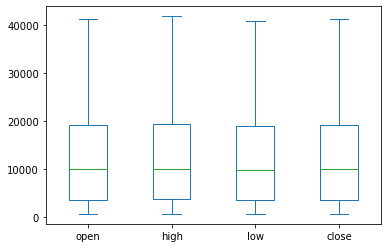

In [16]:
BN[['open','high','low','close']].plot(kind='box')

In [17]:
# Setting the layout for our plot
layout = go.Layout(
    title='Bank nifty Prediction',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monosphere',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
             family='Courier New, monosphere',
             size=18,
             color='#7f7f7f'
        )
    )
)
BN = [{'x':BN['Date'],'y':BN['close']}]
plot = go.Figure(data=BN,layout=layout)
    

In [18]:
#Plotting offline
iplot(plot)

In [19]:
#Building the regression model
from sklearn.model_selection import train_test_split

# For Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For Model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [30]:
# Split the data into train and test sets
X = np.array(BN.index).reshape(-1,1)
Y = BN['close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=101)


In [26]:
# Feature scaling
scaler = StandardScaler().fit(X_train)


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
#creating a linear model
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [38]:
#plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)


trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
BN = [trace0,trace1]
layout.xaxis.title.text='Day'
plot2 = go.Figure(data=BN, layout=layout)

In [39]:
iplot(plot2)

In [43]:
#calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''

print(scores)


Metric           Train                Test        
r2_score  0.8910733159435555	0.8869378836452378
MSE       12186354.19469438	12240770.690779576

